# Find me a cluster

One solution. You may have yours.

In [2]:
import geopandas as gpd
import seaborn as sns
from libpysal import graph
from sklearn import cluster, preprocessing

In [3]:
chicago = gpd.read_file(
    "https://martinfleischmann.net/sds/clustering/data/chicago_influenza_1918.geojson"
)

Before working with clustering, do you remember that note about data
standardisation? The demographic variables in the table are not using
the same scale, so you need to do something about it before using
K-means.

In [4]:
demographics = [
    "gross_acres",
    "illit",
    "unemployed_pct",
    "ho_pct",
    "agecat1",
    "agecat2",
    "agecat3",
    "agecat4",
    "agecat5",
    "agecat6",
    "agecat7",
]
chicago[demographics] = preprocessing.robust_scale(chicago[demographics])
chicago.head(2)

If you check the values now, you will see that they are all distributed
around 0.

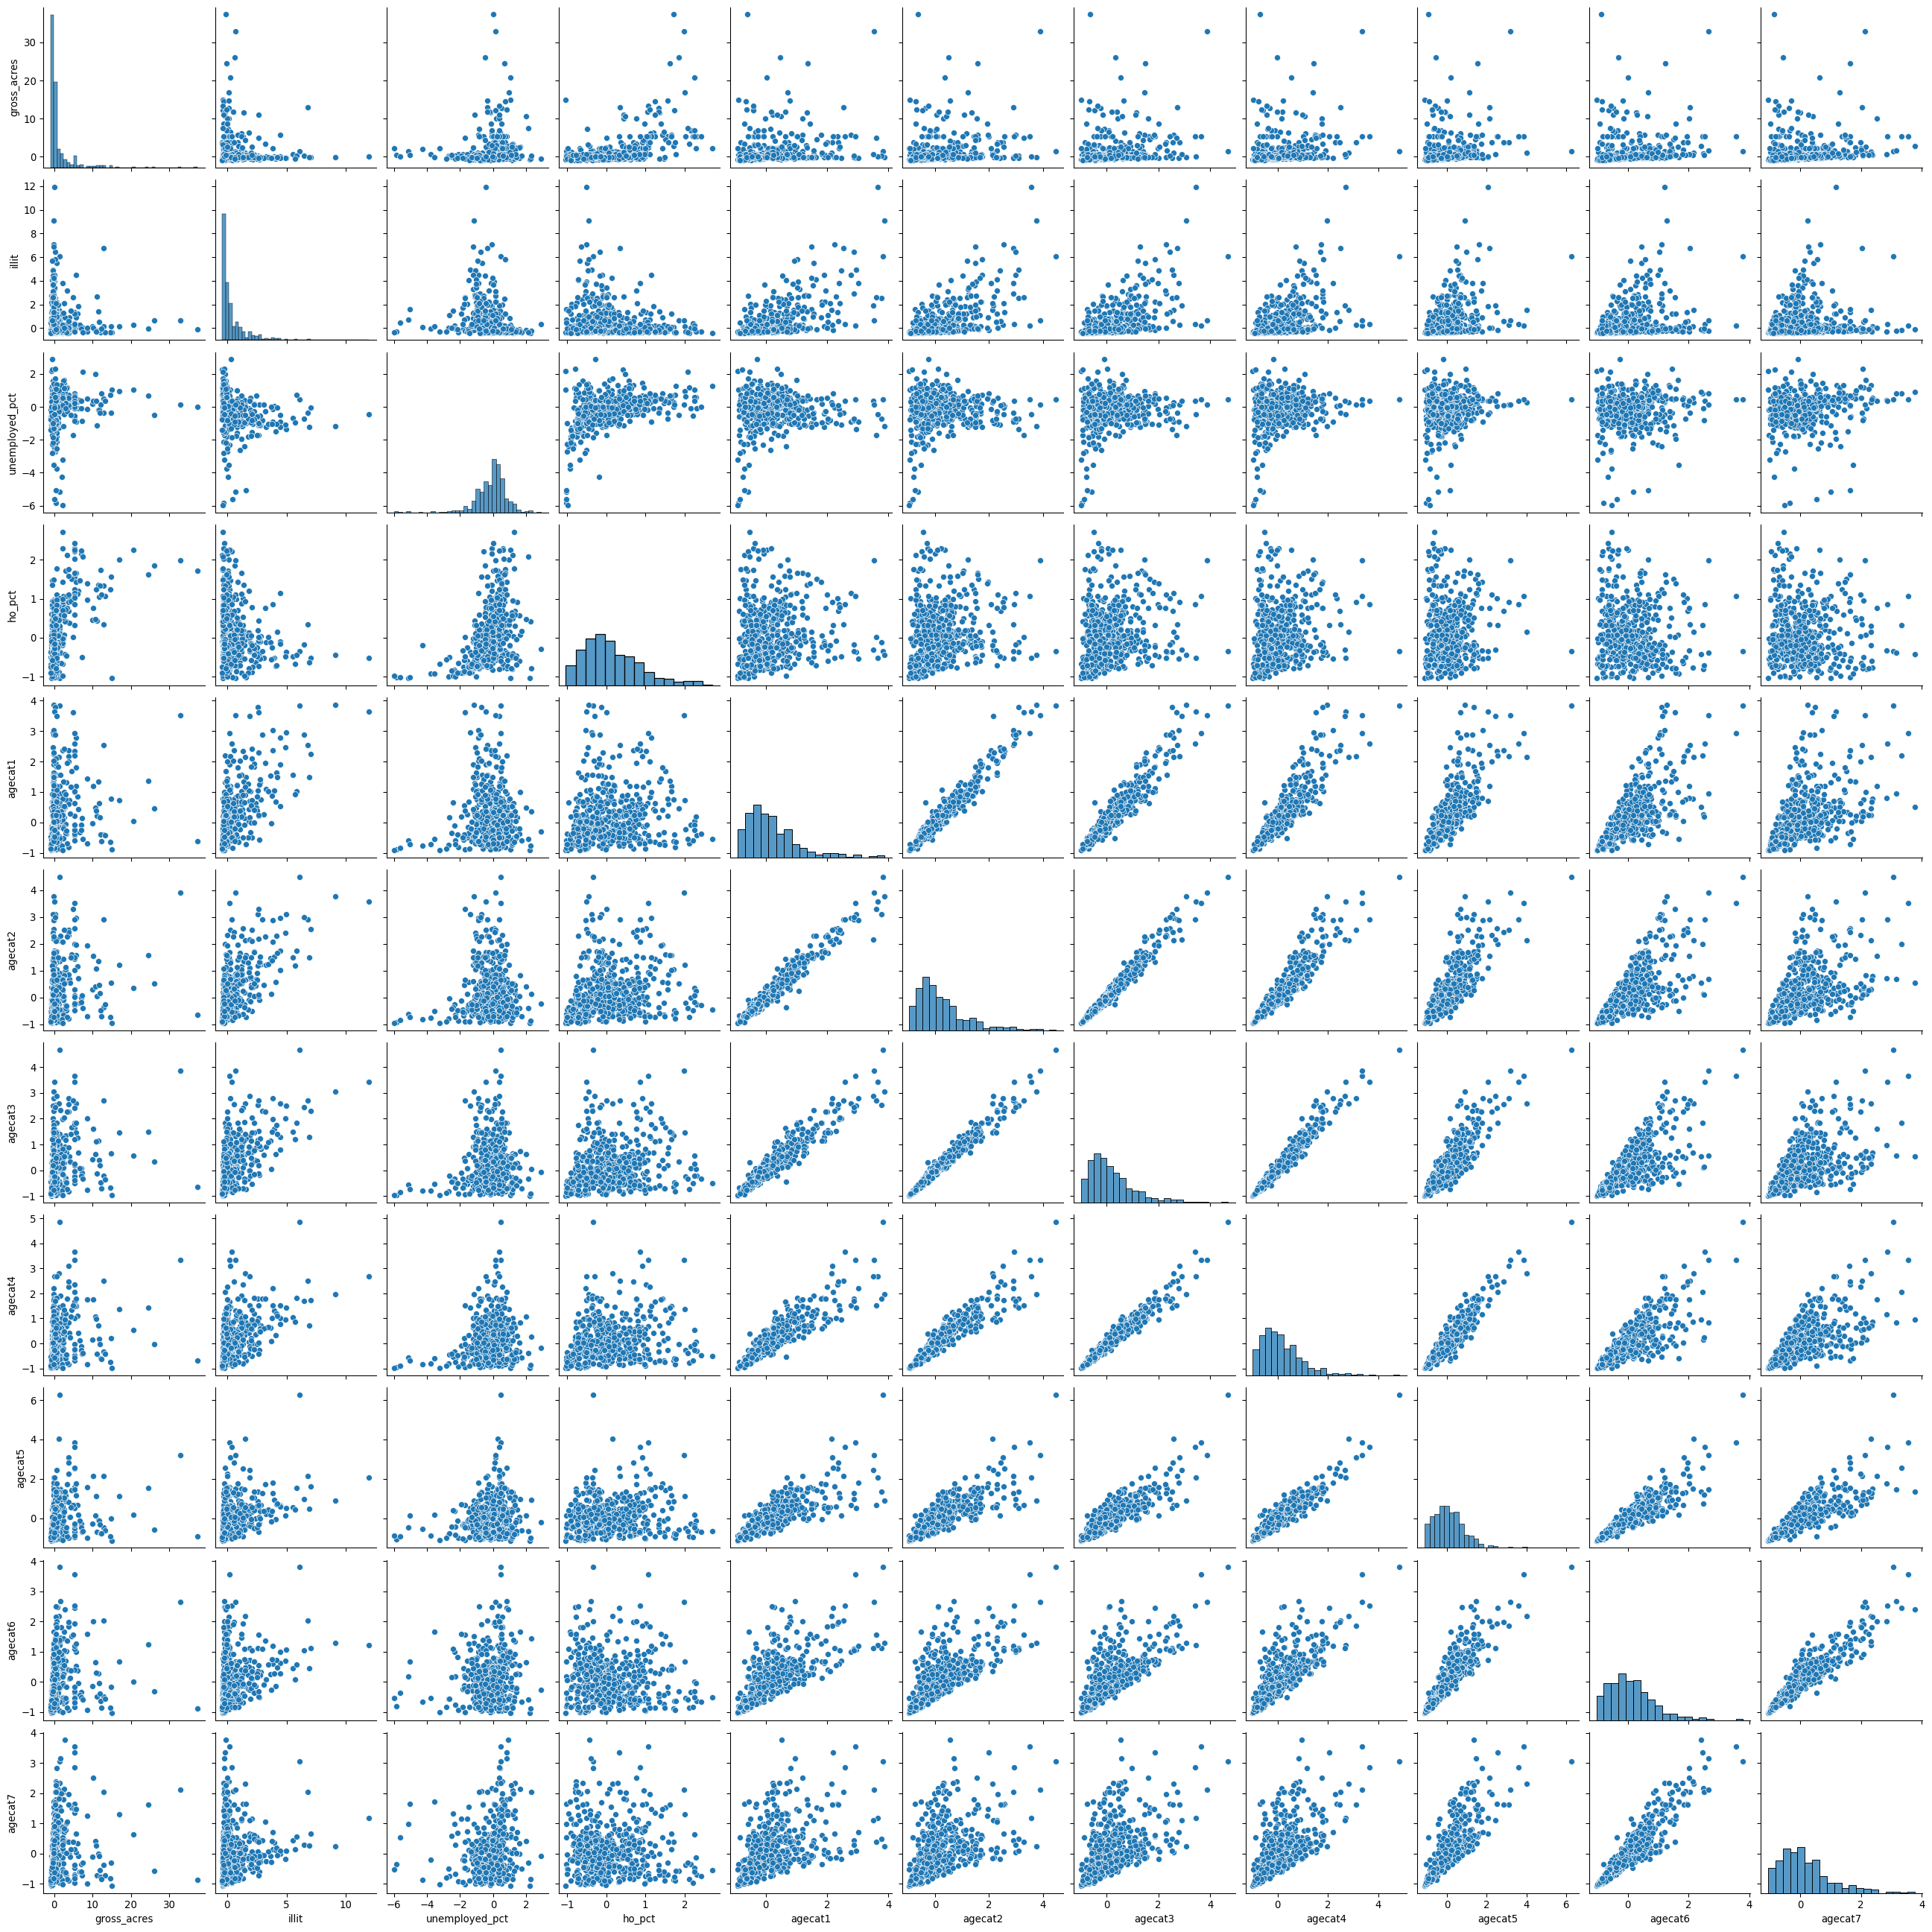

In [5]:
_ = sns.pairplot(chicago[demographics])

Pick a number of clusters

In [6]:
n_clusters = 4

Run K-Means for that number of clusters

In [7]:
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0, n_init=1000)
kmeans.fit(chicago[demographics])

Plot the different clusters on a map

In [8]:
chicago["cluster"] = kmeans.labels_

chicago.explore("cluster", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_85bd0dd696c4f5a7e798d2fd7d702ddf {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>

 <style>html, body {
 width: 100%;
 height: 100%;
 margin: 0;
 padding: 0;
 }
 </style>

 <style>#map {
 position:absolute;
 top:0;
 bottom:0;
 right:0;
 left:0;
 }
 </style>

 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>

 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster' class='maplegend'>
 <div class='legend-title'>cluster</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_85bd0dd696c4f5a7e798d2fd7d702ddf" ></div>
 
</body>
<script>
 
 
 var map_85bd0dd696c4f5a7e798d2fd7d702ddf = L.map(
 "map_85bd0dd696c4f5a7e798d2fd7d702ddf",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 ...{
 "zoom": 10,
 "zoomControl": true,
 "preferCanvas": false,
}

 }
 );
 L.control.scale().addTo(map_85bd0dd696c4f5a7e798d2fd7d702ddf);

 

 
 
 var tile_layer_6f30daa937f366fed2c7c64dbc6e2bd4 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/

Analyse the results: - What do you find? - What are the main
characteristics of each cluster? - How are clusters distributed
geographically? - Can you identify some groups concentrated on
particular areas?

In [9]:
groups = chicago.groupby('cluster')
groups.size()

cluster
0    356
1     36
2     99
3      5
dtype: int64

In [10]:
groups[demographics].mean().T

Create spatially lagged K-Means.

In [11]:
queen = graph.Graph.build_contiguity(chicago).transform("r")

for column in demographics:
    chicago[column + "_lag"] = queen.lag(chicago[column])

demographics_spatial = demographics + [column + "_lag" for column in demographics]

kmeans_lag = cluster.KMeans(n_clusters=n_clusters, random_state=42, n_init=1000)
kmeans_lag.fit(chicago[demographics_spatial])

chicago["cluster_lag"] = kmeans_lag.labels_

chicago.explore("cluster_lag", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_8f331f356486c43aa50d4e888aa48672 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>

 <style>html, body {
 width: 100%;
 height: 100%;
 margin: 0;
 padding: 0;
 }
 </style>

 <style>#map {
 position:absolute;
 top:0;
 bottom:0;
 right:0;
 left:0;
 }
 </style>

 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>

 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_lag' class='maplegend'>
 <div class='legend-title'>cluster_lag</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_8f331f356486c43aa50d4e888aa48672" ></div>
 
</body>
<script>
 
 
 var map_8f331f356486c43aa50d4e888aa48672 = L.map(
 "map_8f331f356486c43aa50d4e888aa48672",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 ...{
 "zoom": 10,
 "zoomControl": true,
 "preferCanvas": false,
}

 }
 );
 L.control.scale().addTo(map_8f331f356486c43aa50d4e888aa48672);

 

 
 
 var tile_layer_2cde50139d525b6769023c380ef97519 = L.tileLayer(
 "https://tile.openstreetmap.

Develop a regionalisation using agglomerative clustering

In [12]:
agg = cluster.AgglomerativeClustering(n_clusters=n_clusters, connectivity=queen.sparse)
agg.fit(chicago[demographics])

In [13]:
chicago["cluster_agg"] = agg.labels_

chicago.explore("cluster_agg", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_a94532502bd2376ccb0e79e970194711 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>

 <style>html, body {
 width: 100%;
 height: 100%;
 margin: 0;
 padding: 0;
 }
 </style>

 <style>#map {
 position:absolute;
 top:0;
 bottom:0;
 right:0;
 left:0;
 }
 </style>

 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>

 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_agg' class='maplegend'>
 <div class='legend-title'>cluster_agg</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_a94532502bd2376ccb0e79e970194711" ></div>
 
</body>
<script>
 
 
 var map_a94532502bd2376ccb0e79e970194711 = L.map(
 "map_a94532502bd2376ccb0e79e970194711",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 ...{
 "zoom": 10,
 "zoomControl": true,
 "preferCanvas": false,
}

 }
 );
 L.control.scale().addTo(map_a94532502bd2376ccb0e79e970194711);

 

 
 
 var tile_layer_34964e255607d88933aadf2e8389c8ef = L.tileLayer(
 "https://tile.openstreetmap.

Generate a geography that contains only the boundaries of each region
and visualise it.

In [14]:
regions = chicago[["cluster_agg", "geometry"]].dissolve("cluster_agg")
regions.reset_index().explore("cluster_agg", categorical=True)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_82f1e9db46aed0a722b0d998df27a331 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>

 <style>html, body {
 width: 100%;
 height: 100%;
 margin: 0;
 padding: 0;
 }
 </style>

 <style>#map {
 position:absolute;
 top:0;
 bottom:0;
 right:0;
 left:0;
 }
 </style>

 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>

 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
 <script>$( function() {
 $( ".maplegend" ).draggable({
 start: function (event, ui) {
 $(this).css({
 right: "auto",
 top: "auto",
 bottom: "auto"
 });
 }
 });
 });
 </script>
 <style type='text/css'>
 .maplegend {
 position: absolute;
 z-index:9999;
 background-color: rgba(255, 255, 255, .8);
 border-radius: 5px;
 box-shadow: 0 0 15px rgba(0,0,0,0.2);
 padding: 10px;
 font: 12px/14px Arial, Helvetica, sans-serif;
 right: 10px;
 bottom: 20px;
 }
 .maplegend .legend-title {
 text-align: left;
 margin-bottom: 5px;
 font-weight: bold;
 }
 .maplegend .legend-scale ul {
 margin: 0;
 margin-bottom: 0px;
 padding: 0;
 float: left;
 list-style: none;
 }
 .maplegend .legend-scale ul li {
 list-style: none;
 margin-left: 0;
 line-height: 16px;
 margin-bottom: 2px;
 }
 .maplegend ul.legend-labels li span {
 display: block;
 float: left;
 height: 14px;
 width: 14px;
 margin-right: 5px;
 margin-left: 0;
 border: 0px solid #ccc;
 }
 .maplegend .legend-source {
 color: #777;
 clear: both;
 }
 .maplegend a {
 color: #777;
 }
 </style>
 
</head>
<body>
 
 
 <div id='maplegend cluster_agg' class='maplegend'>
 <div class='legend-title'>cluster_agg</div>
 <div class='legend-scale'>
 <ul class='legend-labels'>
 <li><span style='background:#1f77b4'></span>0</li>
 <li><span style='background:#d62728'></span>1</li>
 <li><span style='background:#f7b6d2'></span>2</li>
 <li><span style='background:#9edae5'></span>3</li>
 </ul>
 </div>
 </div>
 
 
 <div class="folium-map" id="map_82f1e9db46aed0a722b0d998df27a331" ></div>
 
</body>
<script>
 
 
 var map_82f1e9db46aed0a722b0d998df27a331 = L.map(
 "map_82f1e9db46aed0a722b0d998df27a331",
 {
 center: [41.84028129129861, -87.67299965880729],
 crs: L.CRS.EPSG3857,
 ...{
 "zoom": 10,
 "zoomControl": true,
 "preferCanvas": false,
}

 }
 );
 L.control.scale().addTo(map_82f1e9db46aed0a722b0d998df27a331);

 

 
 
 var tile_layer_f5b44a3f53916641009964a8c094f898 = L.tileLayer(
 "https://tile.openstreetmap.